# 1.The LASSO and Boosting for Regression 

## (a) Download the Communities and Crime data from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data asthe training set and the rest as the test set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.linear_model import LinearRegression,LassoCV,Ridge,Lasso,RidgeCV
from sklearn.model_selection import train_test_split,cross_val_score,validation_curve,KFold,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,scale
from sklearn import metrics
from sklearn.decomposition import PCA
import random
random.seed(5)
import scipy.stats as st
import xgboost.sklearn as xgb

In [2]:
df=pd.read_csv("communities.txt",header=None)
df=df.replace('?',np.nan)
df[df.isnull().any(axis=1)]

0    1      2                       3    4     5     6     7     8    \
0       8  NaN    NaN            Lakewoodcity    1  0.19  0.33  0.02  0.90   
1      53  NaN    NaN             Tukwilacity    1  0.00  0.16  0.12  0.74   
2      24  NaN    NaN            Aberdeentown    1  0.00  0.42  0.49  0.56   
3      34    5  81440     Willingborotownship    1  0.04  0.77  1.00  0.08   
4      42   95   6096       Bethlehemtownship    1  0.01  0.55  0.02  0.95   
5       6  NaN    NaN       SouthPasadenacity    1  0.02  0.28  0.06  0.54   
6      44    7  41500             Lincolntown    1  0.01  0.39  0.00  0.98   
7       6  NaN    NaN               Selmacity    1  0.01  0.74  0.03  0.46   
8      21  NaN    NaN           Hendersoncity    1  0.03  0.34  0.20  0.84   
9      29  NaN    NaN             Claytoncity    1  0.01  0.40  0.06  0.87   
10      6  NaN    NaN            DalyCitycity    1  0.13  0.71  0.15  0.07   
11     36  NaN    NaN  RockvilleCentrevillage    1  0.02  0.46  0.08  0.91   
12     25   21  44105             Needhamtown    1  0.03  0.47  0.01  0.96   
13     55   87  30075          GrandChutetown    1  0.01  0.44  0.00  0.98   
14      6  NaN    NaN           DanaPointcity    1  0.04  0.36  0.01  0.85   
15     19  187  91370           FortDodgecity    1  0.03  0.34  0.06  0.93   
17     34   27  17650        Denvilletownship    1  0.01  0.53  0.01  0.94   
18     18  NaN    NaN          Valparaisocity    1  0.02  0.47  0.01  0.97   
19     42  129  66376       Rostravertownship    1  0.00  0.41  0.05  0.96   
20      6  NaN    NaN             Modestocity    1  0.25  0.54  0.05  0.71   
21     12   31    NaN        Jacksonvillecity    1  1.00  0.42  0.47  0.59   
22     41  NaN    NaN        KlamathFallscity    1  0.01  0.34  0.02  0.87   
24      6  NaN    NaN              Delanocity    1  0.02  0.96  0.05  0.00   
25      8  NaN    NaN              Goldencity    1  0.00  0.33  0.02  0.91   
26      6  NaN    NaN             Gardenacity    1  0.06  0.49  0.46  0.00   
27     39   29  61798           Perrytownship    1  0.01  0.37  0.01  0.99   
28     54  NaN    NaN             Beckleycity    1  0.01  0.27  0.43  0.64   
29      9    7  22490         EastHamptontown    1  0.00  0.50  0.01  0.98   
30      1  NaN    NaN             Cullmancity    1  0.01  0.30  0.00  0.99   
31     19  NaN    NaN           DesMoinescity    1  0.29  0.34  0.14  0.84   
...   ...  ...    ...                     ...  ...   ...   ...   ...   ...   
1960   38  105  86220           Willistoncity   10  0.01  0.39  0.00  0.94   
1961   39   35  16014    ClevelandHeightscity   10  0.07  0.40  0.72  0.39   
1962    6  NaN    NaN          SantaMariacity   10  0.08  0.66  0.04  0.41   
1964   36  119  49121         MountVernoncity   10  0.09  0.45  1.00  0.08   
1965   18   97    NaN        Indianapoliscity   10  1.00  0.36  0.44  0.64   
1966    6  NaN    NaN         RedwoodCitycity   10  0.09  0.41  0.07  0.74   
1967   25   17  76135            Westfordtown   10  0.01  0.66  0.00  0.97   
1968   34   25  62430          RedBankborough   10  0.00  0.24  0.51  0.53   
1969    6  NaN    NaN        SanFranciscocity   10  1.00  0.29  0.21  0.29   
1970   45  NaN    NaN               Caycecity   10  0.00  0.37  0.38  0.69   
1971    1  NaN    NaN             Decaturcity   10  0.06  0.39  0.32  0.73   
1972    6  NaN    NaN            Redlandscity   10  0.08  0.49  0.07  0.69   
1973   39  NaN    NaN           Englewoodcity   10  0.00  0.38  0.03  0.97   
1974   37  NaN    NaN             Tarborotown   10  0.00  0.41  0.62  0.51   
1975   53  NaN    NaN            Kirklandcity   10  0.05  0.27  0.03  0.89   
1976   25   17   1605           Arlingtontown   10  0.06  0.29  0.03  0.93   
1977   47  NaN    NaN           Maryvillecity   10  0.01  0.35  0.06  0.94   
1978    9    1   4720              Betheltown   10  0.01  0.54  0.02  0.94   
1979   34   39  61530              Rahwaycity   10  0.02  0.43  0.39  0.63   
1980   25    5  69170       

In [3]:
training_data=df[:1495]
testing_data=df[1495:]

In [5]:
df.shape

(1994, 128)

* The dataset consists of 1994 rows  and 128 columns with the first 5 being Categorical variables and rest are numerical. The **final attribute** is the dependent variable of the dataset

In [6]:
df.columns=["state",
"county",
"community",
"communityname",
"fold",
"population",
"householdsize",
"racepctblack",
"racePctWhite",
"racePctAsian",
"racePctHisp",
"agePct12t21",
"agePct12t29",
"agePct16t24",
"agePct65up",
"numbUrban",
"pctUrban",
"medIncome",
"pctWWage",
"pctWFarmSelf",
"pctWInvInc",
"pctWSocSec",
"pctWPubAsst",
"pctWRetire",
"medFamInc",
"perCapInc",
"whitePerCap",
"blackPerCap",
"indianPerCap",
"AsianPerCap",
"OtherPerCap",
"HispPerCap",
"NumUnderPov",
"PctPopUnderPov",
"PctLess9thGrade",
"PctNotHSGrad",
"PctBSorMore",
"PctUnemployed",
"PctEmploy",
"PctEmplManu",
"PctEmplProfServ",
"PctOccupManu",
"PctOccupMgmtProf",
"MalePctDivorce",
"MalePctNevMarr",
"FemalePctDiv",
"TotalPctDiv",
"PersPerFam",
"PctFam2Par",
"PctKids2Par",
"PctYoungKids2Par",
"PctTeen2Par",
"PctWorkMomYoungKids",
"PctWorkMom",
"NumIlleg",
"PctIlleg",
"NumImmig",
"PctImmigRecent",
"PctImmigRec5",
"PctImmigRec8",
"PctImmigRec10",
"PctRecentImmig",
"PctRecImmig5",
"PctRecImmig8",
"PctRecImmig10",
"PctSpeakEnglOnly",
"PctNotSpeakEnglWell",
"PctLargHouseFam",
"PctLargHouseOccup",
"PersPerOccupHous",
"PersPerOwnOccHous",
"PersPerRentOccHous",
"PctPersOwnOccup",
"PctPersDenseHous",
"PctHousLess3BR",
"MedNumBR",
"HousVacant",
"PctHousOccup",
"PctHousOwnOcc",
"PctVacantBoarded",
"PctVacMore6Mos",
"MedYrHousBuilt",
"PctHousNoPhone",
"PctWOFullPlumb",
"OwnOccLowQuart",
"OwnOccMedVal",
"OwnOccHiQuart",
"RentLowQ",
"RentMedian",
"RentHighQ",
"MedRent",
"MedRentPctHousInc",
"MedOwnCostPctInc",
"MedOwnCostPctIncNoMtg",
"NumInShelters",
"NumStreet",
"PctForeignBorn",
"PctBornSameState",
"PctSameHouse85",
"PctSameCity85",
"PctSameState85",
"LemasSwornFT",
"LemasSwFTPerPop",
"LemasSwFTFieldOps",
"LemasSwFTFieldPerPop",
"LemasTotalReq",
"LemasTotReqPerPop",
"PolicReqPerOffic",
"PolicPerPop",
"RacialMatchCommPol",
"PctPolicWhite",
"PctPolicBlack",
"PctPolicHisp",
"PctPolicAsian",
"PctPolicMinor",
"OfficAssgnDrugUnits",
"NumKindsDrugsSeiz",
"PolicAveOTWorked",
"LandArea",
"PopDens",
"PctUsePubTrans",
"PolicCars",
"PolicOperBudg",
"LemasPctPolicOnPatr",
"LemasGangUnitDeploy",
"LemasPctOfficDrugUn",
"PolicBudgPerPop",
"ViolentCrimesPerPop"
]

<br/>
<br/>





## (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set.

The first 5 columns are of not predictors and hence have been removed from the dataset.

In [9]:
numdata=df.drop(['county','community','communityname','state','fold'],axis=1).select_dtypes(include=['int64','float64'])
nadata=df.drop(['county','community','communityname','state','fold'],axis=1).select_dtypes(include=['object'])

In [10]:
numdata[numdata.isnull().any(axis=1)]

Empty DataFrame
Columns: [population, householdsize, racepctblack, racePctWhite, racePctAsian, racePctHisp, agePct12t21, agePct12t29, agePct16t24, agePct65up, numbUrban, pctUrban, medIncome, pctWWage, pctWFarmSelf, pctWInvInc, pctWSocSec, pctWPubAsst, pctWRetire, medFamInc, perCapInc, whitePerCap, blackPerCap, indianPerCap, AsianPerCap, HispPerCap, NumUnderPov, PctPopUnderPov, PctLess9thGrade, PctNotHSGrad, PctBSorMore, PctUnemployed, PctEmploy, PctEmplManu, PctEmplProfServ, PctOccupManu, PctOccupMgmtProf, MalePctDivorce, MalePctNevMarr, FemalePctDiv, TotalPctDiv, PersPerFam, PctFam2Par, PctKids2Par, PctYoungKids2Par, PctTeen2Par, PctWorkMomYoungKids, PctWorkMom, NumIlleg, PctIlleg, NumImmig, PctImmigRecent, PctImmigRec5, PctImmigRec8, PctImmigRec10, PctRecentImmig, PctRecImmig5, PctRecImmig8, PctRecImmig10, PctSpeakEnglOnly, PctNotSpeakEnglWell, PctLargHouseFam, PctLargHouseOccup, PersPerOccupHous, PersPerOwnOccHous, PersPerRentOccHous, PctPersOwnOccup, PctPersDenseHous, PctHousLess3BR, MedNumBR, HousVacant, PctHousOccup, PctHousOwnOcc, PctVacantBoarded, PctVacMore6Mos, MedYrHousBuilt, PctHousNoPhone, PctWOFullPlumb, OwnOccLowQuart, OwnOccMedVal, OwnOccHiQuart, RentLowQ, RentMedian, RentHighQ, MedRent, MedRentPctHousInc, MedOwnCostPctInc, MedOwnCostPctIncNoMtg, NumInShelters, NumStreet, PctForeignBorn, PctBornSameState, PctSameHouse85, PctSameCity85, PctSameState85, LandArea, PopDens, PctUsePubTrans, LemasPctOfficDrugUn, ViolentCrimesPerPop]
Index: []

[0 rows x 100 columns]

In [11]:
nadata=nadata.apply(pd.to_numeric,errors='ignore')

In [12]:
nadata.fillna(nadata.mean(),inplace=True)

In [13]:
final=pd.concat([numdata,nadata],axis=1)

The technique used to impute the dataset is Central Imputation i.e substituting missing values with a measure of **Central Tendency**( e.g:mean,median,mode). For Categorical data we use mode to impute missing values. And for numerical attributes we use Mean or Median. Here, the missing values are substituted with **Mean** of the rest of the valid observations.

<br/><br/>
## (c) Plot a correlation matrix for the features in the data set.

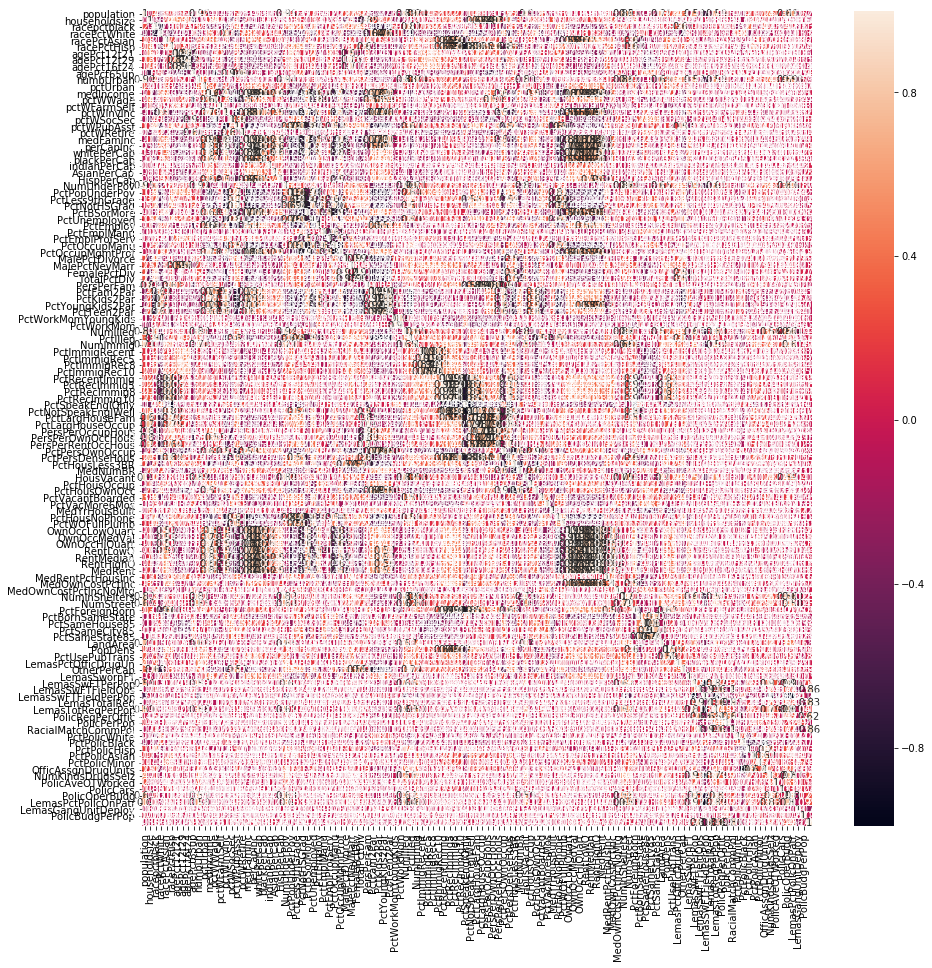

In [61]:
corr=final.drop(["ViolentCrimesPerPop"],axis=1).corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(final.corr(), 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True,ax=ax)

The correlation for all the predictors is depicted by the above diagram. As we know Correlation is the Square Root of R2 score we tabulate in Regression. It takes values between 1 and -1. If value x1 increases with increase in x2 value or vice versa then they are said to be positively correlated. Else, if the x1 decreases with increase in x2 value then they are negatively correlated.

<br/><br/>
### (e) Pick √128 features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots?

In [19]:
CV=final.std()/final.mean()

In [21]:
CV=CV.sort_values(ascending=False)[:11]
print(CV)

NumStreet              4.407702
NumInShelters          3.485481
NumIlleg               2.994196
NumImmig               2.900497
LemasPctOfficDrugUn    2.555266
NumUnderPov            2.304970
population             2.203503
numbUrban              2.001744
HousVacant             1.958780
LandArea               1.678031
racePctHisp            1.614278
dtype: float64


In [22]:
lj=np.array(CV.index[:11])

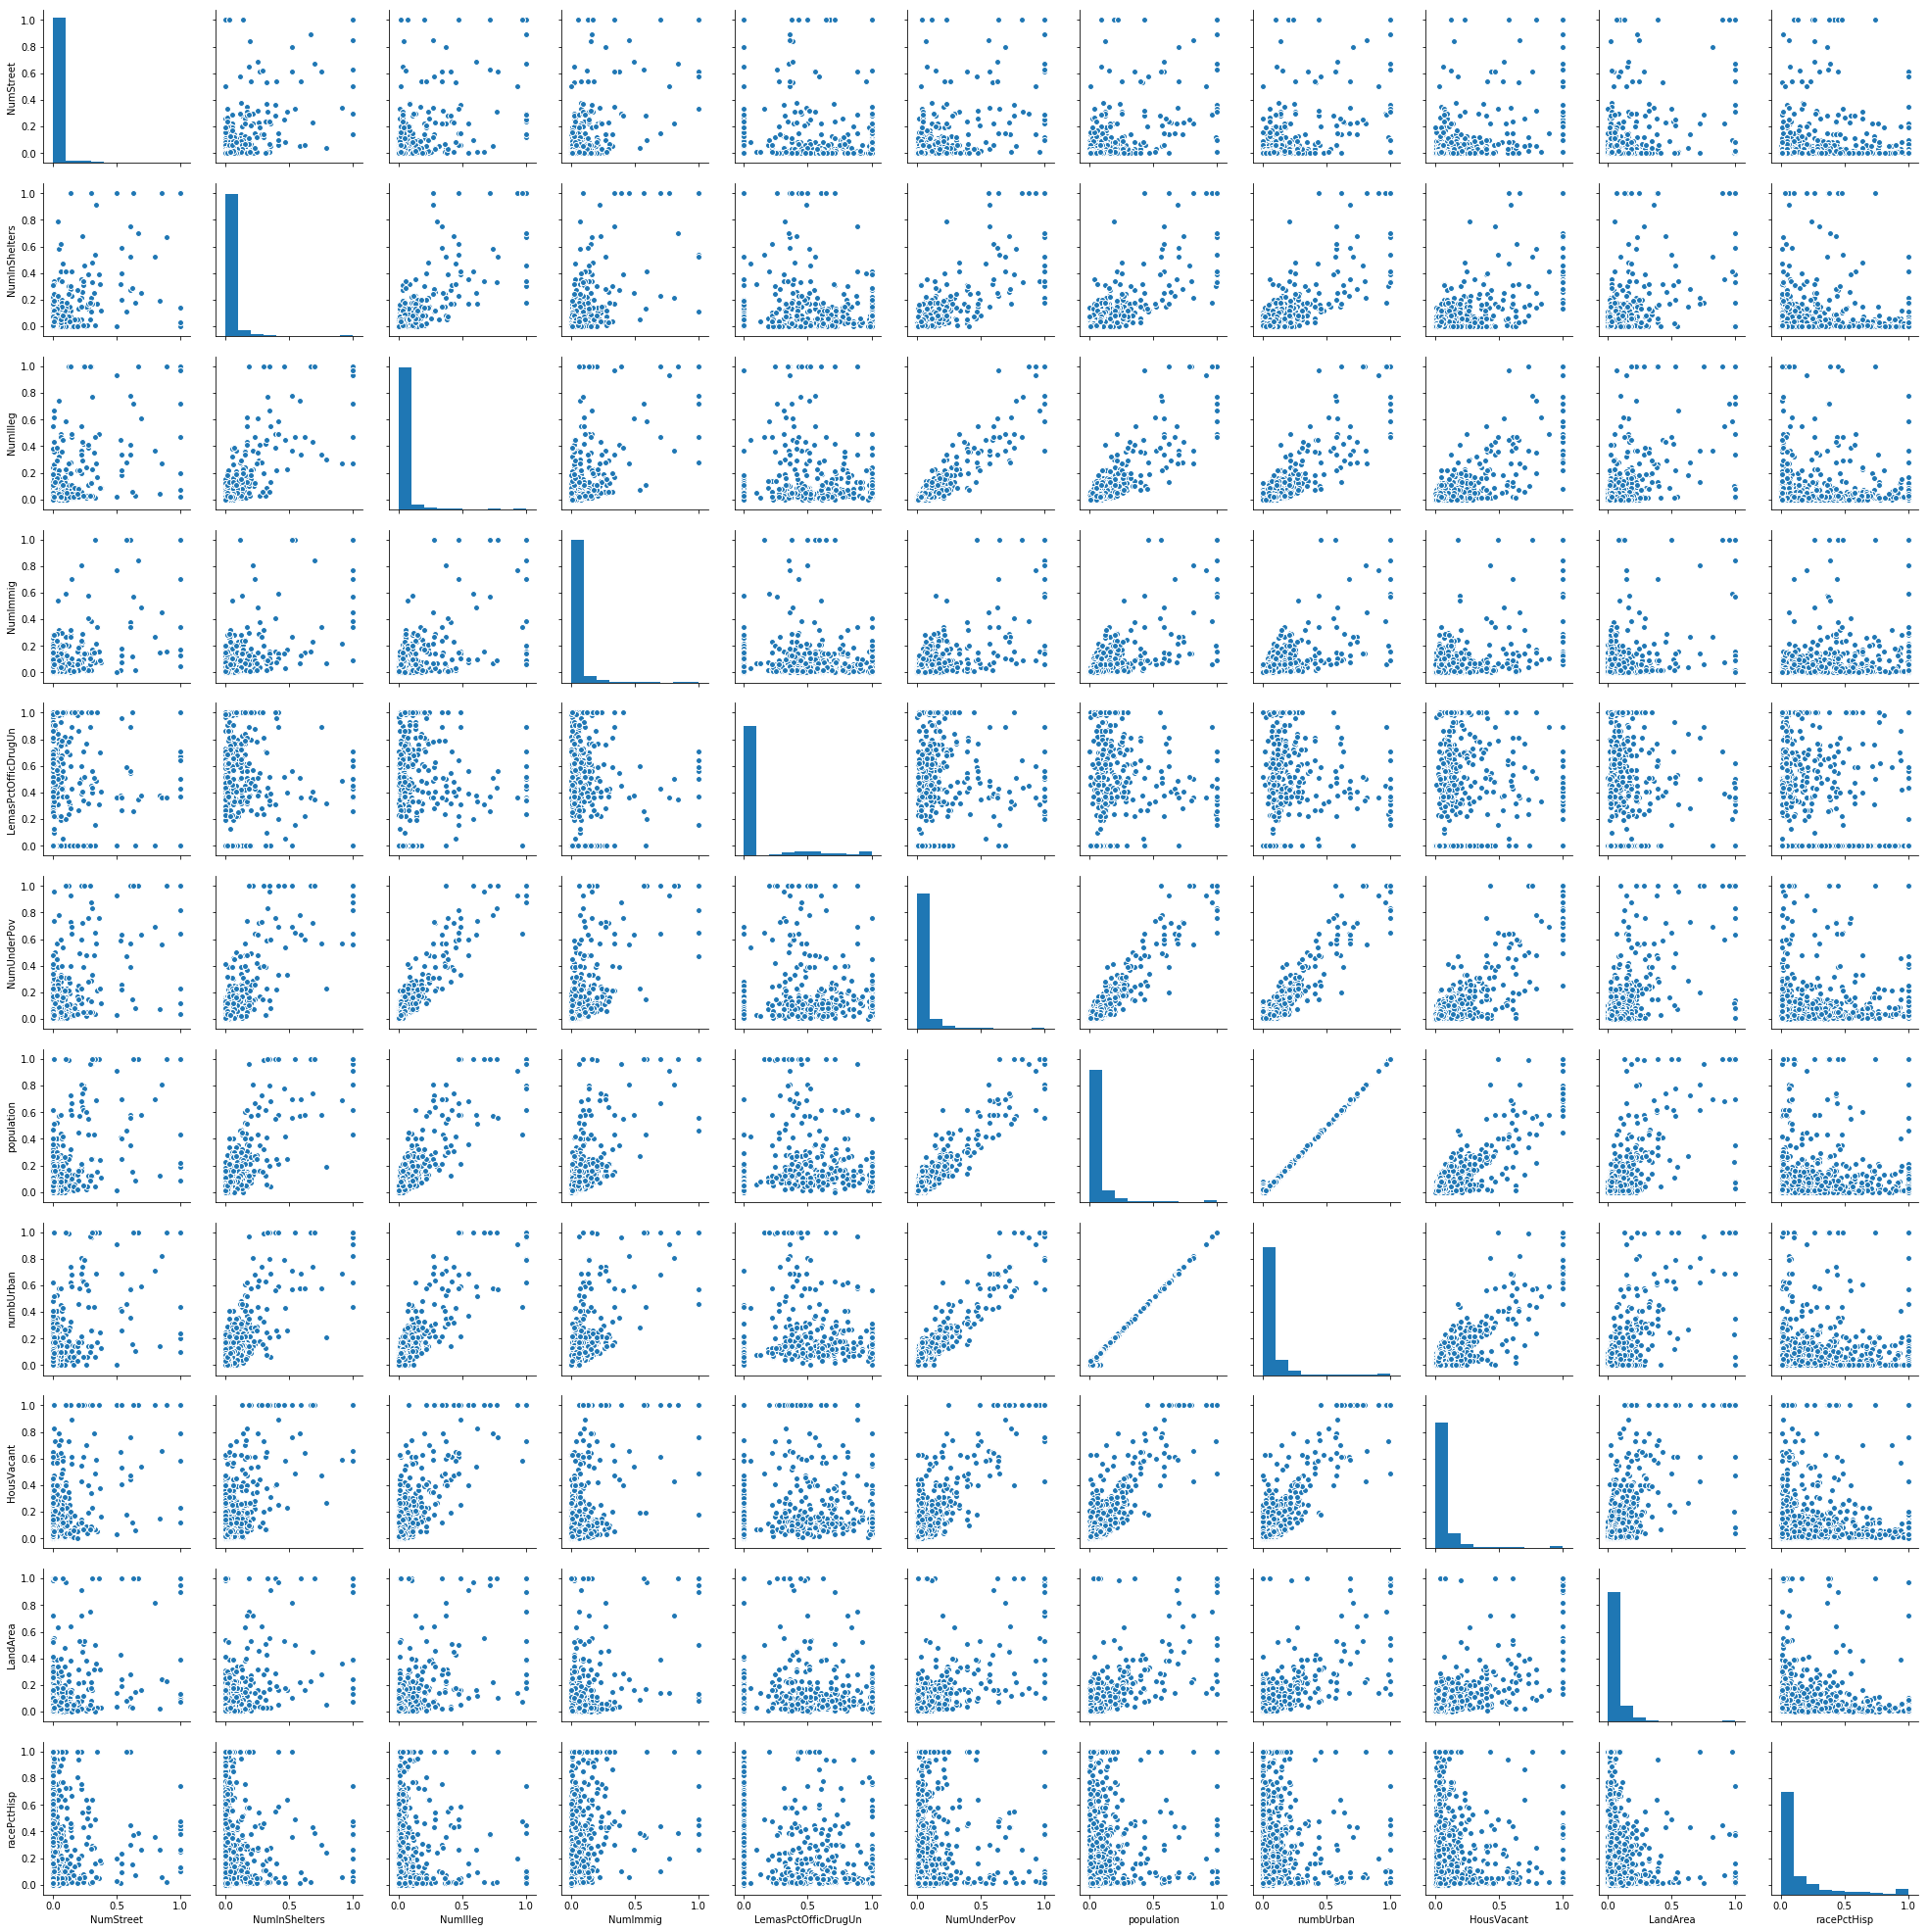

In [60]:
sns.pairplot(final[lj])

/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


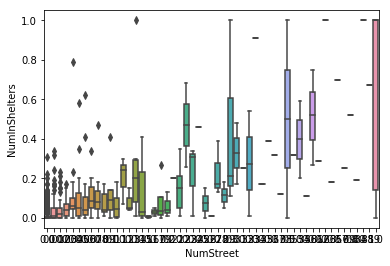

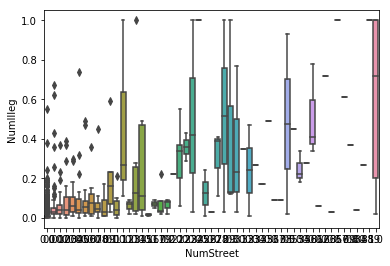

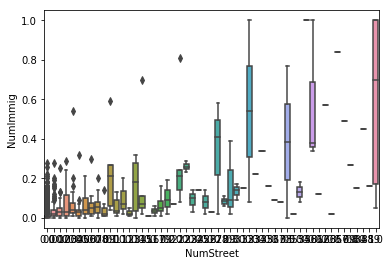

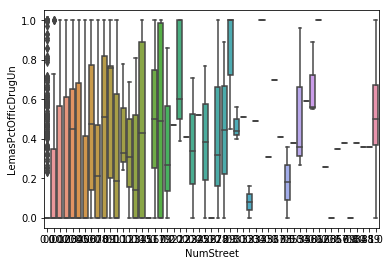

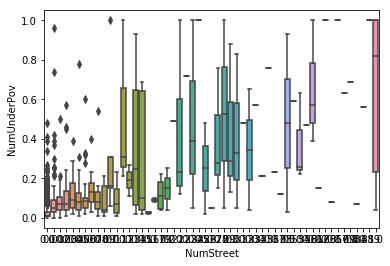

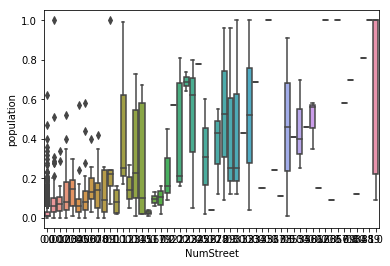

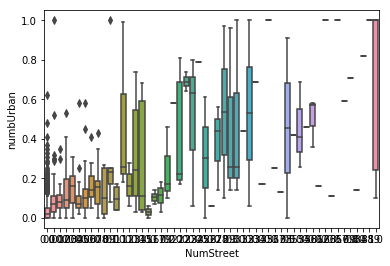

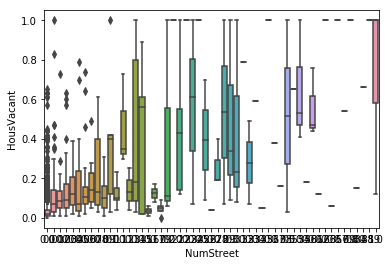

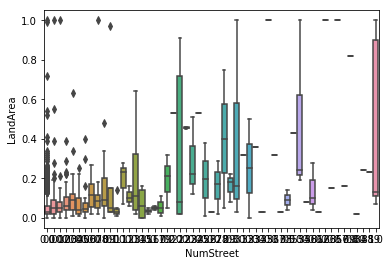

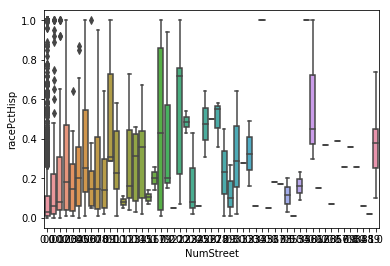

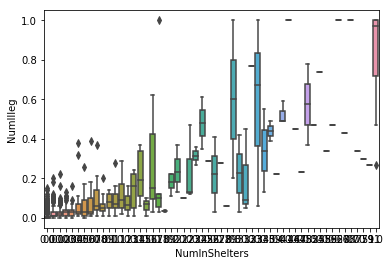

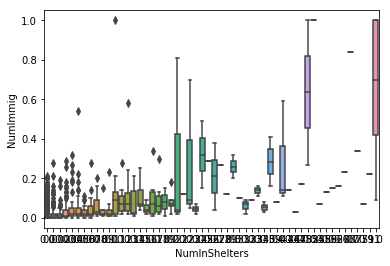

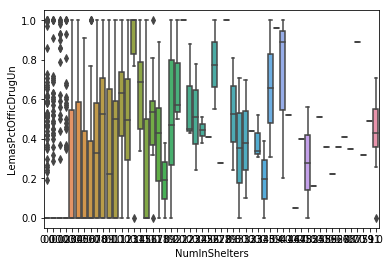

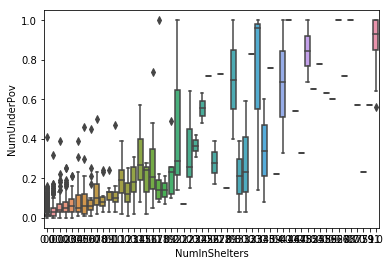

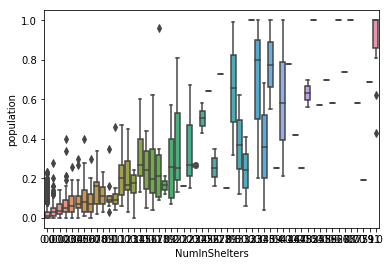

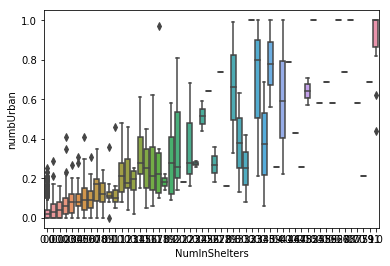

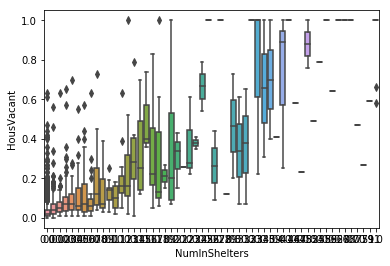

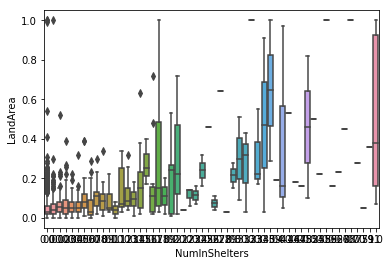

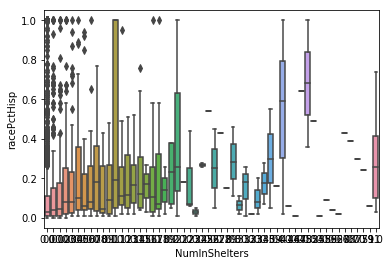

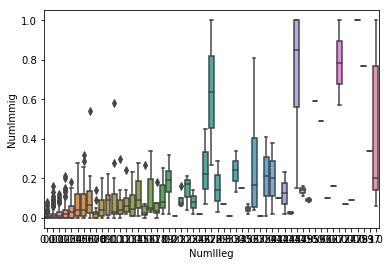

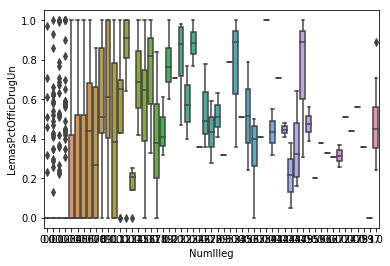

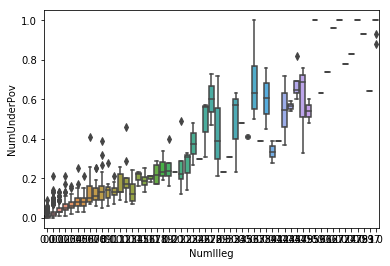

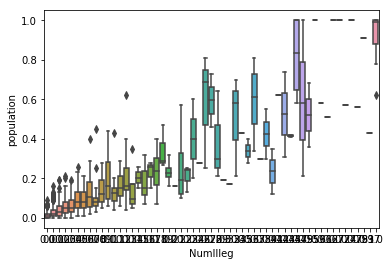

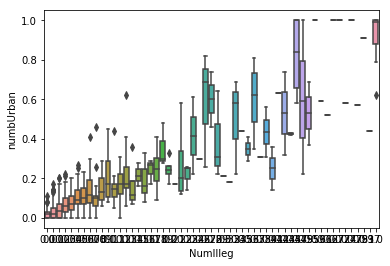

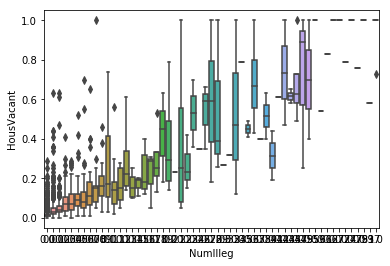

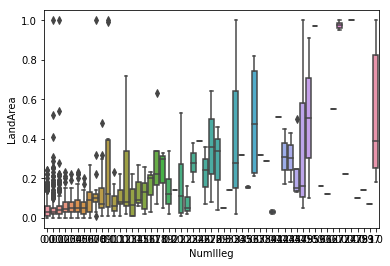

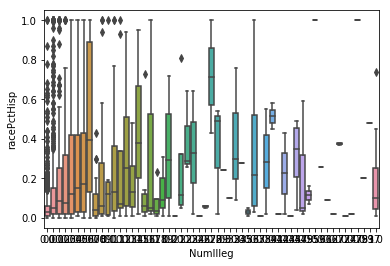

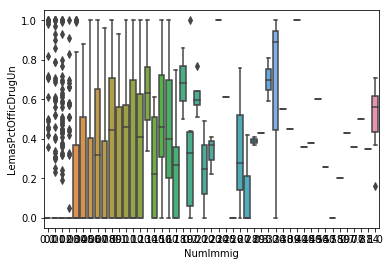

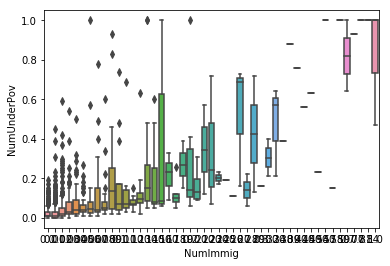

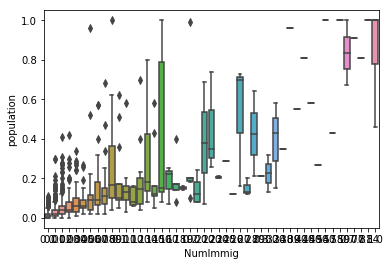

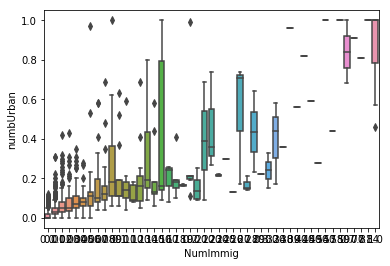

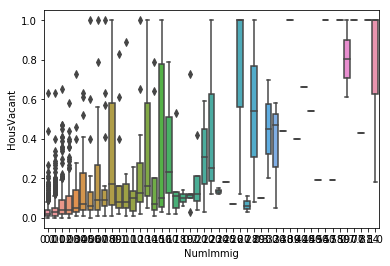

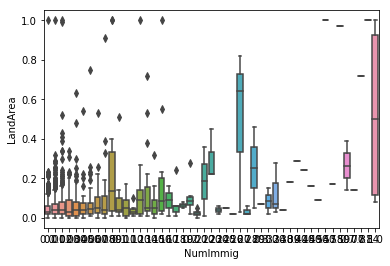

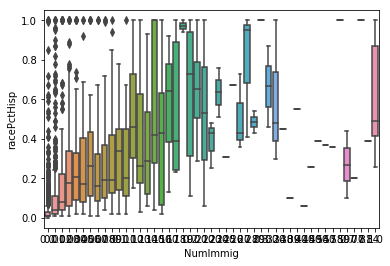

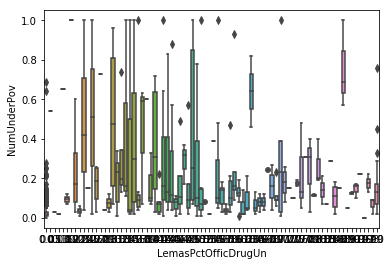

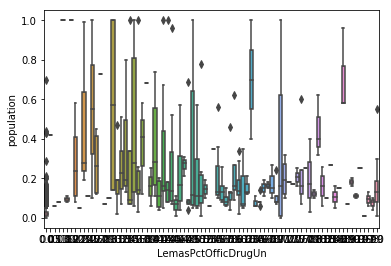

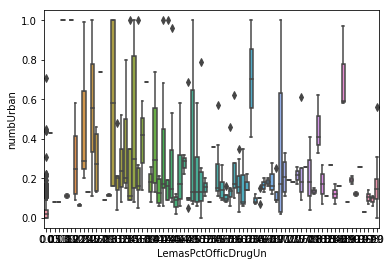

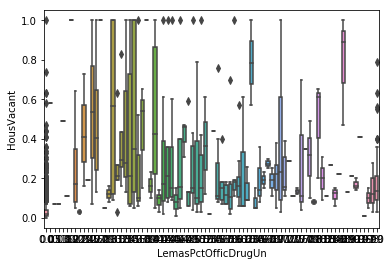

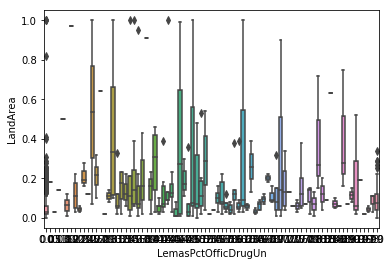

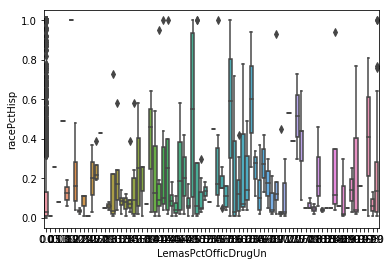

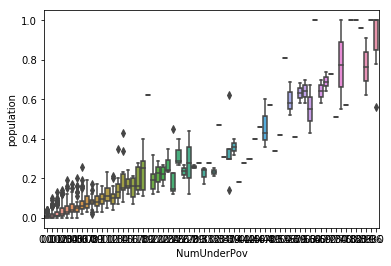

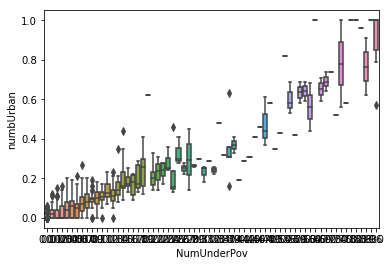

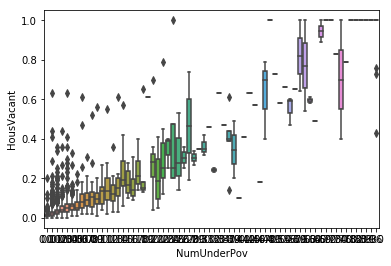

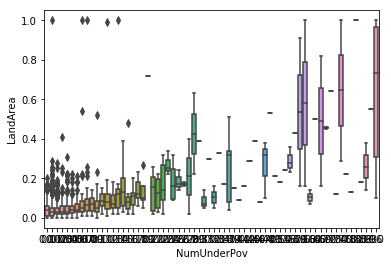

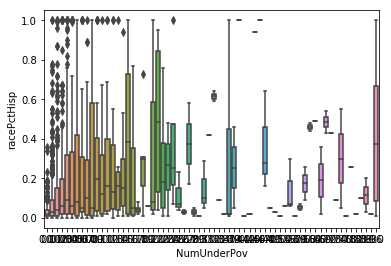

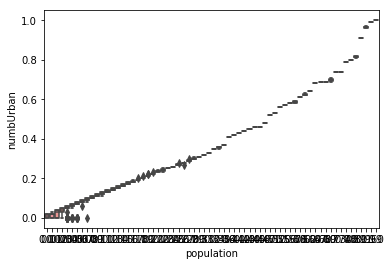

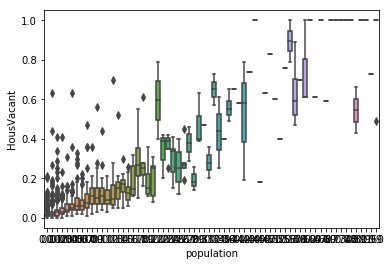

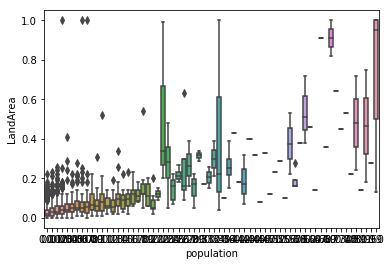

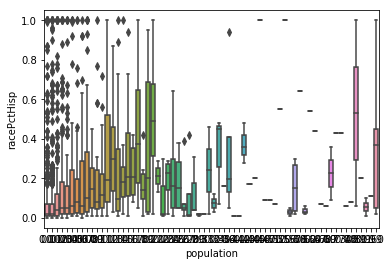

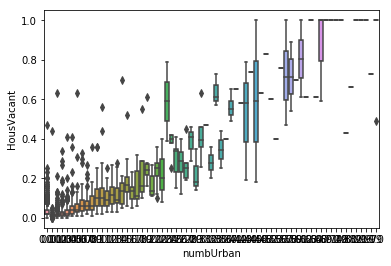

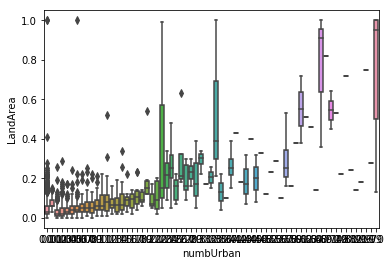

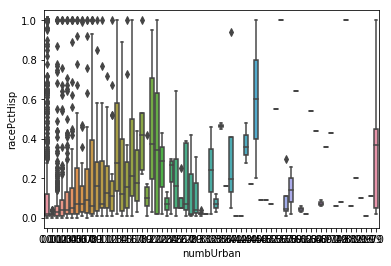

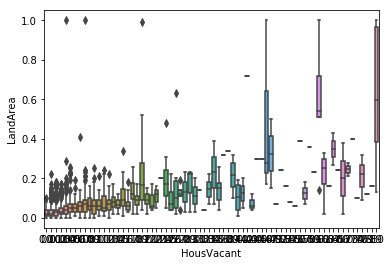

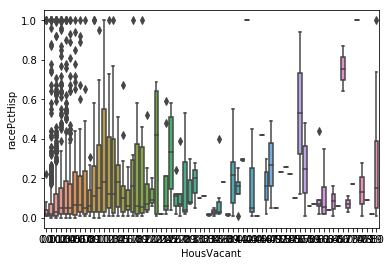

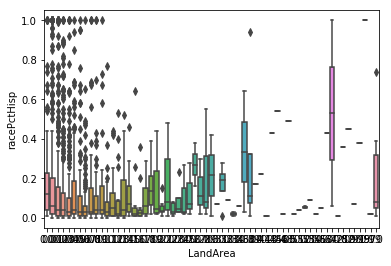

<Figure size 432x288 with 0 Axes>

In [62]:
for i in range(0,len(lj)-1):
    for j in range(i+1,len(lj)):
        sns.boxplot(x=lj[i],y=lj[j],data=final)
        plt.figure()

From the  scatter plots we can just determine the Correlation between the features and their distribution . For instance, the attributes Population and NumbUnderPov are positively correlated as the number of poor people increase in densely populated areas such as cities and towns etc.


The significance of those features cannot be interpreted just by scatter plots because there might be a third variable explaining the relationship between two variables.(Confounding variables)

<br/><br/>
### (f) Fit a linear model using least squares to the training set and report the test error.

In [25]:
trainset=final[:1495]
ytrain=trainset.ViolentCrimesPerPop
xtrain=trainset.drop(['ViolentCrimesPerPop'],axis=1)
testset=final[1495:]
ytest=testset.ViolentCrimesPerPop
xtest=testset.drop(['ViolentCrimesPerPop'],axis=1)

In [43]:
mod1=LinearRegression()
mod1.fit(xtrain,ytrain)
ypred=mod1.predict(xtest)
print("The test error for Linear Regression",metrics.mean_squared_error(ytest,ypred)) 

The test error for Linear Regression 0.7897255274352741


 The test error obtained with the metric as MSE is 0.7897. This model was fit with the Least Squares method of Regression.

<br/><br/>
### (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [29]:
range1=np.arange(0,5,0.01)
ridge_l=[]
print("Lambda values obtained with different values of K in KFold Cross Validation")
for i in range(4,11):
    mod2_cv=RidgeCV(alphas=range1,cv=i)
    mod2_cv.fit(xtrain,ytrain)
    ridge_l.append(mod2_cv.alpha_)
    print(mod2_cv.alpha_)

Lambda values obtained with different values of K in KFold Cross Validation
2.32
2.29
1.95
2.64
2.02
2.74
2.23


The Lambda values for all different values of K obtained after cross-validation are depicted in the above cell. The mean value is a suitable Lambda to be used in Ridge Regression. 

In [31]:
np.mean(np.array(ridge_l))

2.3128571428571427

In [32]:
mod2=Ridge(alpha=2.30)
mod2.fit(xtrain,ytrain)
ypred_ridge=mod2.predict(xtest)
print(metrics.mean_squared_error(ytest,ypred_ridge))

0.017603732283718507


The Test error with the metric of MSE is better than the Ordinary Least Squares Regression as it accounts for Variance by Penalizing the Coefficients of Regression

<br/><br/>
### (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with normalized features. Report the test error for both cases and compare them.

In [39]:
#range1=np.arange(1000,1000,1000)
range1=[1e-20,1e-15,1e-10,1e-7,1e-5,1e-3,1e-1,1,2,4]
lasso_l=[]
for i in range(4,11):
    mod3_cv=LassoCV(cv=i,max_iter=10)
    mod3_cv.fit(xtrain,ytrain)
    lasso_l.append(mod3_cv.alpha_)
    print(mod3_cv.alpha_,'\n',mod3_cv.coef_)

/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.00010101894290116463 
 [ 0.26494629 -0.01325207  0.34034999 -0.06610495 -0.04421394  0.10751619
  0.00775077 -0.10432561  0.00300785  0.09965487 -0.04993421  0.04305074
 -0.21251724 -0.0888127   0.01821361 -0.10974517 -0.0541863   0.09456893
 -0.16173976  0.07267502 -0.00051423 -0.00605063 -0.01291536 -0.03387162
  0.02238014  0.0227607  -0.05949322 -0.0502197  -0.00420052  0.03438799
  0.          0.00238591  0.05390479 -0.03314198 -0.00308211  0.05784223
 -0.01210994  0.15930566  0.09940949 -0.05215164 -0.          0.05256797
 -0.09871989 -0.00532938 -0.03566124 -0.00042151 -0.03457326 -0.07080516
 -0.10291143  0.0203885  -0.05785596 -0.02032619 -0.00689787 -0.
 -0.          0.04230824  0.01994613  0.0187794   0.00837415  0.08364846
 -0.01551171 -0.02008983 -0.00527954  0.11258291 -0.01368532 -0.0173339
 -0.02892705  0.00588448  0.03835712 -0.00068624  0.06777117 -0.10064855
  0.05253653  0.05480975 -0.07085625 -0.02932378 -0.05978531 -0.03996603
  0.05321134  0.01875784  0.       

/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceW

0.00010101894290116463 
 [ 0.26494629 -0.01325207  0.34034999 -0.06610495 -0.04421394  0.10751619
  0.00775077 -0.10432561  0.00300785  0.09965487 -0.04993421  0.04305074
 -0.21251724 -0.0888127   0.01821361 -0.10974517 -0.0541863   0.09456893
 -0.16173976  0.07267502 -0.00051423 -0.00605063 -0.01291536 -0.03387162
  0.02238014  0.0227607  -0.05949322 -0.0502197  -0.00420052  0.03438799
  0.          0.00238591  0.05390479 -0.03314198 -0.00308211  0.05784223
 -0.01210994  0.15930566  0.09940949 -0.05215164 -0.          0.05256797
 -0.09871989 -0.00532938 -0.03566124 -0.00042151 -0.03457326 -0.07080516
 -0.10291143  0.0203885  -0.05785596 -0.02032619 -0.00689787 -0.
 -0.          0.04230824  0.01994613  0.0187794   0.00837415  0.08364846
 -0.01551171 -0.02008983 -0.00527954  0.11258291 -0.01368532 -0.0173339
 -0.02892705  0.00588448  0.03835712 -0.00068624  0.06777117 -0.10064855
  0.05253653  0.05480975 -0.07085625 -0.02932378 -0.05978531 -0.03996603
  0.05321134  0.01875784  0.       

/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceW

8.786112483379066e-05 
 [ 0.28018129 -0.01460531  0.34071588 -0.06759053 -0.04513238  0.11027188
  0.00931942 -0.11362934  0.00692908  0.10317689 -0.06542798  0.04369615
 -0.21501803 -0.08673094  0.01956164 -0.11191308 -0.06180602  0.09564817
 -0.16338418  0.07756011 -0.00223605 -0.01119157 -0.01354832 -0.03443046
  0.02315222  0.02406294 -0.0621157  -0.05441632 -0.00549274  0.03971787
  0.0008741   0.00444674  0.05742347 -0.03575389 -0.00331432  0.05985035
 -0.01152958  0.16066679  0.10224011 -0.05894874 -0.          0.0510979
 -0.1028272  -0.00373298 -0.03617964 -0.00070546 -0.03659882 -0.07097497
 -0.10357204  0.01934857 -0.05876697 -0.0214027  -0.00657948 -0.
 -0.          0.04384605  0.02009156  0.01918894  0.00843295  0.08815052
 -0.01670137 -0.02138121 -0.00467276  0.11619237 -0.0195     -0.01983659
 -0.03512083  0.0091185   0.03828327 -0.00054067  0.07531457 -0.10009093
  0.06192005  0.05517431 -0.07298053 -0.03175908 -0.06106442 -0.04016908
  0.05570875  0.01882117  0.        

/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.00010101894290116463 
 [ 0.26494629 -0.01325207  0.34034999 -0.06610495 -0.04421394  0.10751619
  0.00775077 -0.10432561  0.00300785  0.09965487 -0.04993421  0.04305074
 -0.21251724 -0.0888127   0.01821361 -0.10974517 -0.0541863   0.09456893
 -0.16173976  0.07267502 -0.00051423 -0.00605063 -0.01291536 -0.03387162
  0.02238014  0.0227607  -0.05949322 -0.0502197  -0.00420052  0.03438799
  0.          0.00238591  0.05390479 -0.03314198 -0.00308211  0.05784223
 -0.01210994  0.15930566  0.09940949 -0.05215164 -0.          0.05256797
 -0.09871989 -0.00532938 -0.03566124 -0.00042151 -0.03457326 -0.07080516
 -0.10291143  0.0203885  -0.05785596 -0.02032619 -0.00689787 -0.
 -0.          0.04230824  0.01994613  0.0187794   0.00837415  0.08364846
 -0.01551171 -0.02008983 -0.00527954  0.11258291 -0.01368532 -0.0173339
 -0.02892705  0.00588448  0.03835712 -0.00068624  0.06777117 -0.10064855
  0.05253653  0.05480975 -0.07085625 -0.02932378 -0.05978531 -0.03996603
  0.05321134  0.01875784  0.       

/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [34]:
np.mean(np.array(lasso_l))

0.00010234334771168557

The Lambda value obtained through Cross -Validation is 0.0001.

In [41]:
mod3=Lasso(alpha=0.0001)
mod3.fit(xtrain,ytrain)
ypred_Lasso=mod3.predict(xtest)
print("The Test error without Normalization of features is",metrics.mean_squared_error(ytest,ypred_Lasso))

The Test error without Normalization of features is 0.0177901937356475


The list of Variables used for LASSO Regression are Listed below.

In [45]:
mod3.coef_==0
print("Variables Selected: ",list(xtrain.columns[mod3.coef_!=0]))

Variables Selected:  ['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctSameCity85', 'LandArea', 'PopDens'

The LASSO Regression was Repeated with Normalized features.

In [50]:
mod4=Lasso(alpha=0.0001,normalize=True)
mod4.fit(xtrain,ytrain)

ypred_Lasso_n=mod4.predict(xtest)
print("The test error with Normalized features",metrics.mean_squared_error(ytest,ypred_Lasso_n))

The test error with Normalized features 0.01745704710337291


The test error with normalized features was marginally lower. It does not really affect the model building process.This is because some features are measured in different dimensions and normalizing them makes the training data  slightly better.

<br/><br/>
### (i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [51]:
random.seed(5)
s=StandardScaler()
xtrain_s=s.fit_transform(xtrain)
ex_ra=[]
err_cv=[]
r2=np.arange(1,120,4)
lm=LinearRegression()

for i in r2:
    comp=PCA(n_components=i)
    xd=comp.fit_transform(xtrain_s)
    ex_ra.append(np.sum(comp.explained_variance_ratio_))
    err_cv.append(np.mean(cross_val_score(lm,xd,ytrain,cv=7,scoring='mean_squared_error')))
    print(i,ex_ra,np.mean(cross_val_score(lm,xd,ytrain,cv=7,scoring='mean_squared_error')))  
    

/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  s

1 [0.21207582069303807] -0.03310716926586237
5 [0.21207582069303807, 0.5682708524903286] -0.026222133019553947
9 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739] -0.021228243966994628
13 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299] -0.020901686572615197
17 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482] -0.02070694434500722


/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  s

21 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411] -0.020507875333242026
25 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411, 0.874492318674979] -0.020517595868032916
29 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411, 0.874492318674979, 0.8978334375209642] -0.020311504668636148
33 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411, 0.874492318674979, 0.8978334375209642, 0.9162979071370849] -0.02011179847263619


/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  s

37 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411, 0.874492318674979, 0.8978334375209642, 0.9162979071370849, 0.9316481673031652] -0.020242858820319422
41 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411, 0.874492318674979, 0.8978334375209642, 0.9162979071370849, 0.9316481673031652, 0.9448020096938118] -0.020336479137425905
45 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411, 0.874492318674979, 0.8978334375209642, 0.9162979071370849, 0.9316481673031652, 0.9448020096938118, 0.9554897191865536] -0.02013865397170527


/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  s

49 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411, 0.874492318674979, 0.8978334375209642, 0.9162979071370849, 0.9316481673031652, 0.9448020096938118, 0.9554897191865536, 0.9640217267844204] -0.02018858057758725
53 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411, 0.874492318674979, 0.8978334375209642, 0.9162979071370849, 0.9316481673031652, 0.9448020096938118, 0.9554897191865536, 0.9640217267844204, 0.9709014531737603] -0.02019107899990632
57 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411, 0.874492318674979, 0.8978334375209642, 0.9162979071370849, 0.9316481673031652, 0.9448020096938118, 0.9554897191865536, 0.9640217267844204, 0.9709014531737603, 0.9767418213607141] -0.02007207197523713


/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  s

61 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411, 0.874492318674979, 0.8978334375209642, 0.9162979071370849, 0.9316481673031652, 0.9448020096938118, 0.9554897191865536, 0.9640217267844204, 0.9709014531737603, 0.9767418213607141, 0.9815292507532687] -0.019976482583887577
65 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411, 0.874492318674979, 0.8978334375209642, 0.9162979071370849, 0.9316481673031652, 0.9448020096938118, 0.9554897191865536, 0.9640217267844204, 0.9709014531737603, 0.9767418213607141, 0.9815292507532687, 0.985370139217729] -0.01994377224561305
69 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411, 0.874492318674979, 0.8978334375209642, 0.9162979071370849, 0.9316481673031652, 0.9448020096938118, 0.9554897191865536, 0.9640217267844204, 0.9709014531737603, 0.9767

/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  s

/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  s

73 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411, 0.874492318674979, 0.8978334375209642, 0.9162979071370849, 0.9316481673031652, 0.9448020096938118, 0.9554897191865536, 0.9640217267844204, 0.9709014531737603, 0.9767418213607141, 0.9815292507532687, 0.985370139217729, 0.9884628394181059, 0.9908820775066868] -0.02010686884531827
77 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411, 0.874492318674979, 0.8978334375209642, 0.9162979071370849, 0.9316481673031652, 0.9448020096938118, 0.9554897191865536, 0.9640217267844204, 0.9709014531737603, 0.9767418213607141, 0.9815292507532687, 0.985370139217729, 0.9884628394181059, 0.9908820775066868, 0.992884770132892] -0.020146958569787925


/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  s

81 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411, 0.874492318674979, 0.8978334375209642, 0.9162979071370849, 0.9316481673031652, 0.9448020096938118, 0.9554897191865536, 0.9640217267844204, 0.9709014531737603, 0.9767418213607141, 0.9815292507532687, 0.985370139217729, 0.9884628394181059, 0.9908820775066868, 0.992884770132892, 0.9945514669618226] -0.020294234476766215
85 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411, 0.874492318674979, 0.8978334375209642, 0.9162979071370849, 0.9316481673031652, 0.9448020096938118, 0.9554897191865536, 0.9640217267844204, 0.9709014531737603, 0.9767418213607141, 0.9815292507532687, 0.985370139217729, 0.9884628394181059, 0.9908820775066868, 0.992884770132892, 0.9945514669618226, 0.9959081866262097] -0.020152519960113996


/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  s

89 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411, 0.874492318674979, 0.8978334375209642, 0.9162979071370849, 0.9316481673031652, 0.9448020096938118, 0.9554897191865536, 0.9640217267844204, 0.9709014531737603, 0.9767418213607141, 0.9815292507532687, 0.985370139217729, 0.9884628394181059, 0.9908820775066868, 0.992884770132892, 0.9945514669618226, 0.9959081866262097, 0.9970409404009402] -0.019999806349703744
93 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411, 0.874492318674979, 0.8978334375209642, 0.9162979071370849, 0.9316481673031652, 0.9448020096938118, 0.9554897191865536, 0.9640217267844204, 0.9709014531737603, 0.9767418213607141, 0.9815292507532687, 0.985370139217729, 0.9884628394181059, 0.9908820775066868, 0.992884770132892, 0.9945514669618226, 0.9959081866262097, 0.9970409404009402, 0.9979507585975289] -0.019888269585821794


/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  s

97 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411, 0.874492318674979, 0.8978334375209642, 0.9162979071370849, 0.9316481673031652, 0.9448020096938118, 0.9554897191865536, 0.9640217267844204, 0.9709014531737603, 0.9767418213607141, 0.9815292507532687, 0.985370139217729, 0.9884628394181059, 0.9908820775066868, 0.992884770132892, 0.9945514669618226, 0.9959081866262097, 0.9970409404009402, 0.9979507585975289, 0.9986235274778206] -0.019849678845256156
101 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411, 0.874492318674979, 0.8978334375209642, 0.9162979071370849, 0.9316481673031652, 0.9448020096938118, 0.9554897191865536, 0.9640217267844204, 0.9709014531737603, 0.9767418213607141, 0.9815292507532687, 0.985370139217729, 0.9884628394181059, 0.9908820775066868, 0.992884770132892, 0.9945514669618226, 0.9959081866262097, 0.9970409404009402, 0.99795075859

/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  s

105 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411, 0.874492318674979, 0.8978334375209642, 0.9162979071370849, 0.9316481673031652, 0.9448020096938118, 0.9554897191865536, 0.9640217267844204, 0.9709014531737603, 0.9767418213607141, 0.9815292507532687, 0.985370139217729, 0.9884628394181059, 0.9908820775066868, 0.992884770132892, 0.9945514669618226, 0.9959081866262097, 0.9970409404009402, 0.9979507585975289, 0.9986235274778206, 0.999115063529821, 0.9995048949379979] -0.02015658894327201
109 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411, 0.874492318674979, 0.8978334375209642, 0.9162979071370849, 0.9316481673031652, 0.9448020096938118, 0.9554897191865536, 0.9640217267844204, 0.9709014531737603, 0.9767418213607141, 0.9815292507532687, 0.985370139217729, 0.9884628394181059, 0.9908820775066868, 0.992884770132892, 0.9945514669618226, 0.995908186626

/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  s

113 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411, 0.874492318674979, 0.8978334375209642, 0.9162979071370849, 0.9316481673031652, 0.9448020096938118, 0.9554897191865536, 0.9640217267844204, 0.9709014531737603, 0.9767418213607141, 0.9815292507532687, 0.985370139217729, 0.9884628394181059, 0.9908820775066868, 0.992884770132892, 0.9945514669618226, 0.9959081866262097, 0.9970409404009402, 0.9979507585975289, 0.9986235274778206, 0.999115063529821, 0.9995048949379979, 0.9997530207342433, 0.9999016181778366] -0.020300749472966593
117 [0.21207582069303807, 0.5682708524903286, 0.6980848097882739, 0.7643068964764299, 0.8115740956477482, 0.8458813342177411, 0.874492318674979, 0.8978334375209642, 0.9162979071370849, 0.9316481673031652, 0.9448020096938118, 0.9554897191865536, 0.9640217267844204, 0.9709014531737603, 0.9767418213607141, 0.9815292507532687, 0.985370139217729, 0.9884628394181059, 0.9908820775066868, 0.9928847701

/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/abhinavreddy/anaconda3/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  s

Text(0,0.5,'Cross Validation Score')

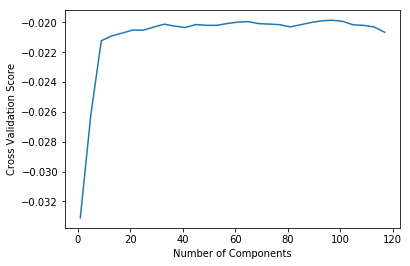

In [53]:
plt.plot(r2,np.array(err_cv))
plt.xlabel('Number of Components')
plt.ylabel('Cross Validation Score')

The number of Components considered are 65 because the Cross validation Score is almost the same for all components after that. 

In [54]:
comp1=PCA(n_components=65)
xd1=comp.fit_transform(xtrain_s)
xtest_s=s.transform(xtest)
xd2=comp.transform(xtest_s)
lm.fit(xd1,ytrain)
ypred_pcr=lm.predict(xd2)
print("The test error of PCR is ",metrics.mean_squared_error(ytest,ypred_pcr))

The test error of PCR is  0.01802869364261214


<br/><br/>
### j) In this section, we would like to fit a boosting tree to the data. As in classificationtrees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation

In [55]:

mod_xg=xgb.XGBRegressor(objective='reg:linear',reg_lambda=0)
params = {  
    #"n_estimators": st.randint(3, 40),
    #"max_depth": st.randint(3, 40),
    #"learning_rate": st.uniform(0.01, 0.4),
    'reg_alpha':st.uniform(0.0001,50) 
}
gb=RandomizedSearchCV(mod_xg,params,n_jobs=1,cv=6)
gb.fit(xtrain,ytrain)   

RandomizedSearchCV(cv=6, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'reg_alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a205bff28>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [59]:
print('The Regularization parameter determined after CV is ',mod4.reg_alpha)

The Regularization parameter determined after CV is  4.147355680731559


In [56]:
mod4=gb.best_estimator_
mod4.fit(xtrain,ytrain)
ypred_xg=mod4.predict(xtest)
print("The test error for XgBoost model is ",metrics.mean_squared_error(ytest,ypred_xg))

The test error for XgBoost model is  0.016459139143158143
